# Ziolkowski et al. (2007), Figure 3

Reproduced by Dieter Werthmüller ([@prisae](https://github.com/prisae)).

A land MTEM (Multi-Transient ElectroMagnetic) example.

> **Ziolkowski, A., B. Hobbs, and D. Wright,  2007**  
> Multitransient electromagnetic demonstration survey in france.  
> Geophysics, 72, F197-F209; DOI: [10.1190/1.2735802](http://dx.doi.org/10.1190/1.2735802).

### Requirements
- `NumPy`
- `SciPy`
- `IPython`
- `Jupyter`
- `matplotlib`
- `empymod` (`pip install empymod` or `conda install -c prisae empymod`)

This example was extracted from the notebook **5a_CSEM.ipynb** in the [example-notebooks](https://github.com/empymod/example-notebooks)-repo of [empymod](https://empymod.github.io).

In [1]:
import numpy as np
from copy import deepcopy as dc
import matplotlib.pyplot as plt

import empymod as epm

In [2]:
# Plot-style adjustments
%matplotlib inline
plt.rcParams['figure.dpi'] = 300

## Ziolkowski et al. (2007), Figure 3 - Original
![title](Ziolkowski2007.jpg)

### Calculation

In [3]:
# Time
t = np.linspace(0.001, 0.06, 101)

# Target model
inp2 = {'src': [0, 0, 0.001],
        'rec': [1000, 0, 0.001],
        'depth': [0, 500, 525],
        'res': [2e14, 20, 500, 20],
        'freqtime': t,
        'verb': 1}

# Halfspace model
inp1 = dc(inp2)
inp1['depth'] = inp2['depth'][0]
inp1['res'] = inp2['res'][:2]

# Calculate responses
sths = epm.dipole(**inp1, signal=1)               # Step, halfspace
sttg = epm.dipole(**inp2, signal=1)               # Step, with a target
imhs = epm.dipole(**inp1, signal=0, ft='fftlog')  # Impulse, halfspace
imtg = epm.dipole(**inp2, signal=0, ft='fftlog')  # Impulse, with a target

### Plot

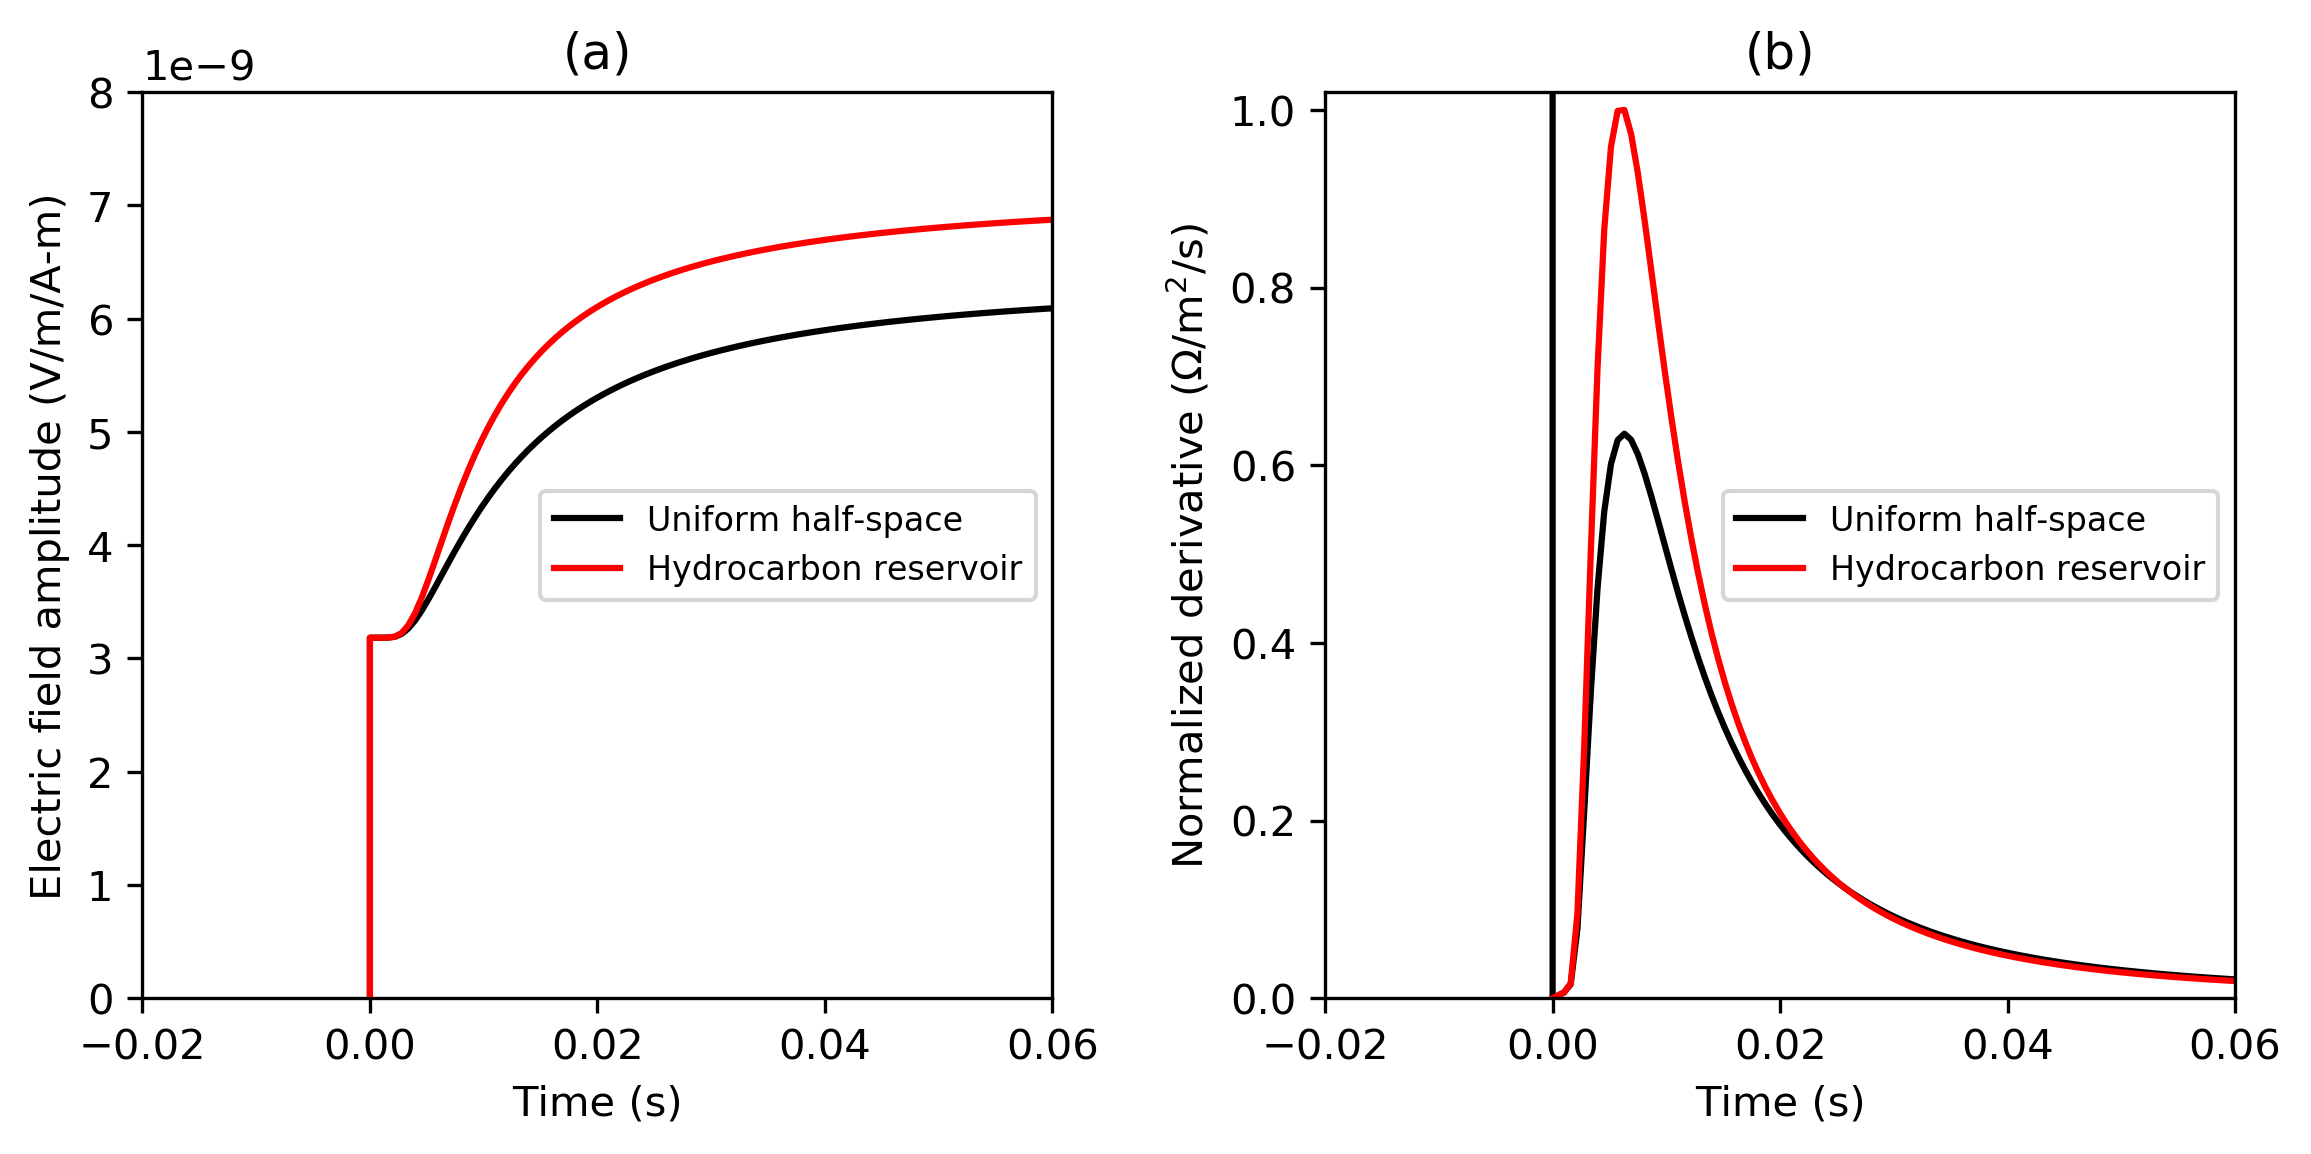

In [4]:
plt.figure(figsize=(9, 4))
plt.subplots_adjust(wspace=.3)

# Step response
plt.subplot(121)
plt.title('(a)')
plt.plot(np.r_[0, 0, t], np.r_[0, sths[0], sths], 'k', label='Uniform half-space')
plt.plot(np.r_[0, 0, t], np.r_[0, sttg[0], sttg], 'r', label='Hydrocarbon reservoir')
plt.axis([-.02, 0.06, 0, 8e-9])
plt.xlabel('Time (s)')
plt.ylabel('Electric field amplitude (V/m/A-m)')
plt.legend(loc=7, fontsize=8)

# Impulse response
plt.subplot(122)
plt.title('(b)')

# Normalize by max-response
ntg = np.max(np.r_[imtg, imhs])

plt.plot(np.r_[0, 0, t], np.r_[2, 0, imhs/ntg], 'k', label='Uniform half-space')
plt.plot(np.r_[0, t], np.r_[0, imtg/ntg], 'r', label='Hydrocarbon reservoir')
plt.axis([-.02, 0.06, 0, 1.02])
plt.xlabel('Time (s)')
plt.ylabel(r'Normalized derivative ($\Omega$/m$^2$/s)')
plt.legend(loc=7, fontsize=8)
plt.show()

Figure 3. (a) Response of a 20 ohm-m half-space at an offset of 1000 m to a 1-A-m step at the source dipole (black curve) and with a 25-m-thick, 500-ohm-m resistive layer at a depth of 500 m (red curve). (b) Normalized impulse response, with normalization factor 3.433E + 6 for a 20 ohm-m half-space (black curve), with peak at 0.00628 s, and with a 25-m-thick, 500-ohm-m resistive layer at a depth of 500 m (red curve), with peak at 0.00585 s. The source and receiver are 1 km apart. The black vertical arrow at time = 0.0 represents the pure inductive effect of the impulse at the source.

In [5]:
epm.versions('HTML')